# <font color='blue'>Estatística Descritiva Bivariada categórica</font>

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])

### Análise bivariada
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

A **análise bivariada** tem como objetivo estudar as relações entre duas variáveis. Essas relações são chamadas de **associações** para variáveis categóricas e **correlações** para variáveis quantitativas e são analisadas por meio de tabelas, gráficos, medidas de associação e por medidas de correlação. <br><br>
As estatísticas descritivas utilizadas para representar as relações entre duas variáveis categóricas são: <br>
- Tabelas de contingência, também conhecidas como tabelas de classificação cruzada, ou ainda, do inglês como cross-tabulation; e <br> 
- Medidas de associação, como a estatística qui-quadrado, o coeficiente de Phi, o coeficiente de contingência, o coeficiente V de Cramer e o coeficiente de Spearman. <br>

As Estatísticas descritivas utilizadas para estudar as relações entre duas variáveis quantitativas são: <br>
- Gráfico de dispersão; <br>
- Coeficiente de correlação. 
</details>

In [ ]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Coletando os dados
df = pd.read_csv('Dados/PlanoSaude.csv', sep=";")
df

In [ ]:
# Alterando os valores do DataFrame
df['Operadora'] = df['Operadora'].replace([1, 2, 3], ["Operadora 1", "Operadora 2", "Operadora 3"])

df["Satisfacao"] = df["Satisfacao"].replace([1, 2, 3], ["Baixo", "Médio", "Alto"])
df

### Tabela de classificação cruzada
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
A forma mais simples de representar as relações entre duas variáveis categóricas é por meio de uma tabela de contingência, também conhecida como tabela de classificação cruzada, ou ainda, *cross-tabulation* em inglês. Essa tabela exibe de forma conjunta as frequências absolutas ou relativas das categorias da variável X, representada no eixo das abscissas, e da variável Y, representada no eixo das ordenadas. <br>

Para criar uma tabela de classificação cruzada, podemos utilizar os seguintes métodos: <br>
- pd.crosstab; <br>
- df.groupby; <br>
- df.pivot_table. 

</details>

In [ ]:
# Tabela de classificação cruzada das frequências absolutas utilizando GroupBy
df.groupby(['Operadora', 'Satisfacao'])['Satisfacao'].count().unstack()

In [ ]:
# Tabela de classificação cruzada das frequências absolutas utilizando Tabela Pivot
df.pivot_table(index='Operadora', columns='Satisfacao', aggfunc={'Satisfacao':len})

In [ ]:
# Criando uma tabela de classificação cruzada das frequências absolutas. O parâmetro "margins" recebendo o valor True, inclui uma linha e uma coluna com os totais das frequências absolutas.
pd.crosstab(df.Operadora, df.Satisfacao, margins=True, margins_name="Total", rownames=["Nome da Operadora"], colnames=["Nível de Satisfação"])

In [ ]:
# Criando uma tabela de classificação cruzada das frequências relativas, em relação a população dos dados.
pd.crosstab(df.Operadora, df.Satisfacao,  margins=True, margins_name="Total", rownames=["Nome da Operadora"], colnames=["Nível de Satisfação %"], normalize=True).round(3)*100

In [ ]:
# Criando uma tabela de classificação cruzada das frequências relativas, em relação as linhas.
pd.crosstab(df.Operadora, df.Satisfacao,  margins=True, margins_name="Total", rownames=["Nome da Operadora"], colnames=["Nível de Satisfação %"], normalize="index").round(3)*100

In [ ]:
# Criando uma tabela de classificação cruzada das frequências relativas, em relação as colunas.
pd.crosstab(df.Operadora, df.Satisfacao,  margins=True, margins_name="Total", rownames=["Nome da Operadora"], colnames=["Nível de Satisfação %"], normalize="columns").round(3)*100

## Exercícios

1 - Utilizando o dataset Titanic, crie uma tabela de classificação cruzada das frequências absolutas entre a variável sobrevivente e a variável sexo. A indexação deverá ser feita pela variável sobrevivente.

In [1]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Coletando os dados
df = pd.read_csv('Dados/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Criando uma tabela de classificação cruzada das frequências absolutas. O parâmetro "margins" recebendo o valor True, inclui uma linha e uma coluna com os totais das frequências absolutas.
df2 = pd.crosstab(df.Survived, df.Sex, margins=True, margins_name="Total", rownames=["Sobrevivente"], colnames=["Sexo"])
df2

Sexo,female,male,Total
Sobrevivente,,,
0,81,468,549
1,233,109,342
Total,314,577,891


2 - Desenhe um gráfico para visualizar os dados da tabela de classificação cruzada criada no exercício anterior.

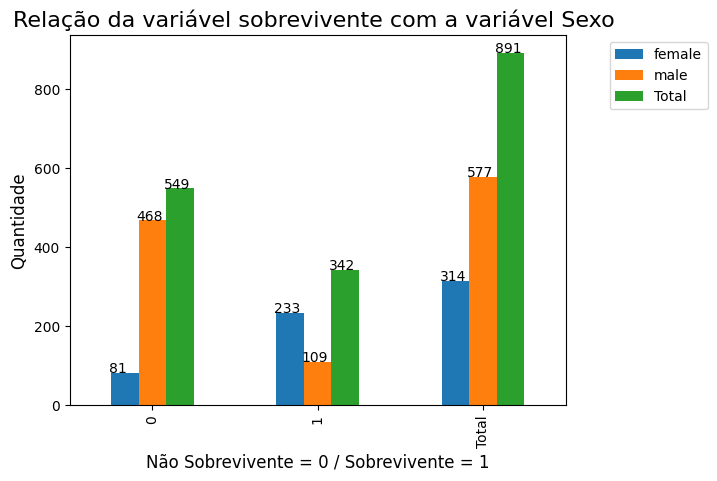

In [4]:
# Criando um gráfico de barras
ax = df2.plot.bar()
ax.set_title("Relação da variável sobrevivente com a variável Sexo ", fontsize = 16)
ax.set_xlabel("Não Sobrevivente = 0 / Sobrevivente = 1", fontsize = 12)
ax.set_ylabel("Quantidade", fontsize = 12)
ax.legend(bbox_to_anchor=(0.8, 0., 0.5, 1.)) # exibe a legenda
for p in ax.patches:
    _x = p.get_x() + p.get_width() - 0.18
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

3 - Crie uma tabela de classificação cruzada das frequências absolutas entre a variável sobrevivente, a variável sexo e a variável Pclass. A indexação deverá ser feita pela variável sobrevivente.

In [5]:
# Criando uma tabela de classificação cruzada das frequências absolutas. O parâmetro "margins" recebendo o valor True, inclui uma linha e uma coluna com os totais das frequências absolutas.
df3 = pd.crosstab(df.Survived, [df.Sex, df.Pclass], margins=True, margins_name="Total", rownames=["Sobrevivente"], colnames=["Sexo", "Classe"])
df3

Sexo         female          male           Total
Classe            1   2    3    1    2    3      
Sobrevivente                                     
0                 3   6   72   77   91  300   549
1                91  70   72   45   17   47   342
Total            94  76  144  122  108  347   891

4 - Desenhe um gráfico para visualizar os dados da tabela de classificação cruzada criada no exercício anterior.

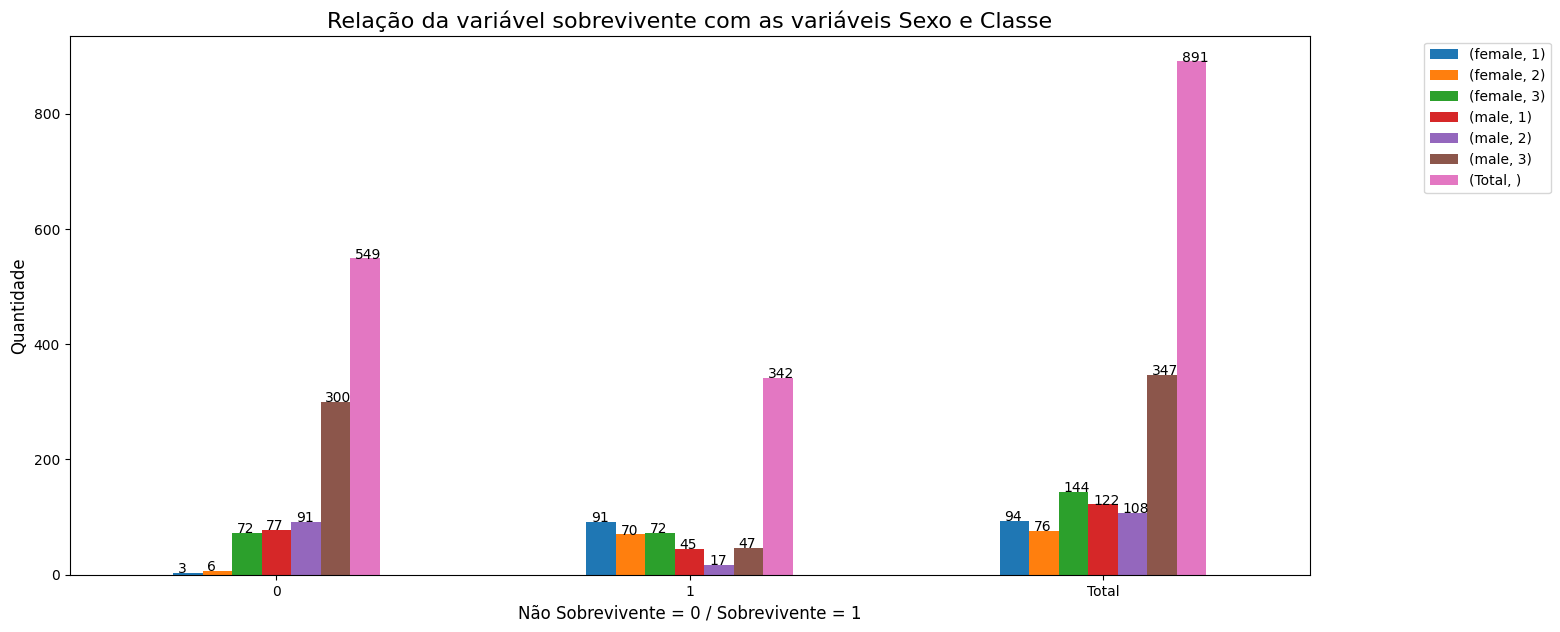

In [6]:
# Desenhando um gráfico de barras
ax = df3.plot.bar(figsize=(16, 7), rot=0)
ax.set_title("Relação da variável sobrevivente com as variáveis Sexo e Classe", fontsize = 16)
ax.set_xlabel("Não Sobrevivente = 0 / Sobrevivente = 1", fontsize = 12)
ax.set_ylabel("Quantidade", fontsize = 12)
ax.legend(bbox_to_anchor=(0.7, 0., 0.5, 1.)) # exibe a legenda
for p in ax.patches:
    _x = p.get_x() + p.get_width() - 0.06
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

5 - Crie uma tabela de classificação cruzada das frequências relativas, em relação a população dos dados, das variáveis sobrevivente e a variável sexo, indexando a variável sobrevivente.

In [7]:
# Criando uma tabela de classificação cruzada das frequências relativas, em relação a população dos dados.
df4 = pd.crosstab(df.Survived, df.Sex, margins=True, margins_name="Total", rownames=["Sobrevivente"], colnames=["Sexo %"], normalize=True).round(3)*100
df4

Sexo %,female,male,Total
Sobrevivente,,,
0,9.1,52.5,61.6
1,26.2,12.2,38.4
Total,35.2,64.8,100.0


6 - Desenhe um gráfico que melhor represente a tabela do exercício anterior.

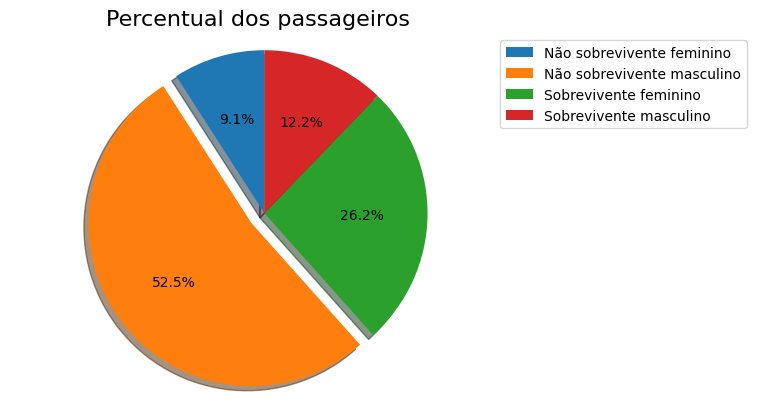

In [8]:
# Desenhando um gráfico de pizza
percentuais = df4[["female","male"]][0:2].values.flatten()# Salva a lista com os percentuais
legenda=["Não sobrevivente feminino", "Não sobrevivente masculino", "Sobrevivente feminino", "Sobrevivente masculino"] # nomes para legenda
explode = (0, 0.1, 0, 0)  # "explode" somente a segunda fatia

fig, ax = plt.subplots()
ax.pie(percentuais, explode=explode, autopct='%1.1f%%',  shadow=True, startangle=90)
ax.set_title("Percentual dos passageiros", fontsize = 16)
ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
ax.legend(bbox_to_anchor=(1., 0., 0.5, 1.), labels=legenda)
plt.show()